<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

<AxesSubplot:>

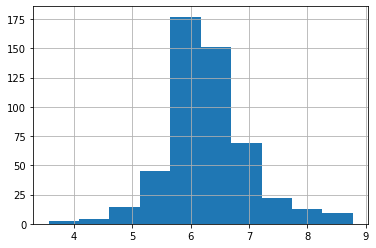

In [5]:
#  ANSWER
data["RM"].hist()

##### 2. Plot Histogram of `MEDV`

<AxesSubplot:>

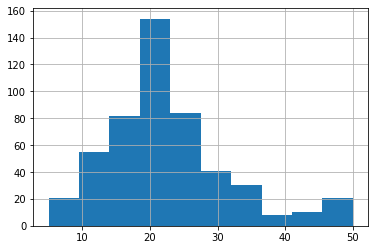

In [6]:
# ANSWER
data["MEDV"].hist()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

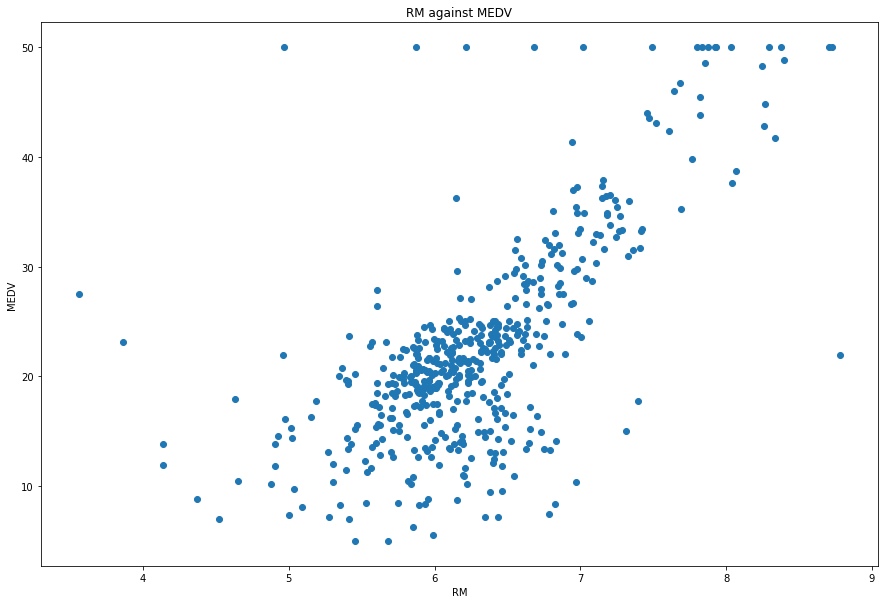

In [40]:
# ANSWER
plt.figure(figsize=(15,10))

#alternative:
    #fig = plt.gcf()
    #fig.set_size_inches(15,10)
    
plt.scatter(data['RM'],data['MEDV'])
#alternative:
    #data.plot(kind='scatter', x='RM', y='MEDV')
    # ^ but cannot use plt.figure to change size with this method
    
plt.title('RM against MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

##### 3.B Is there any trend? State your observation.

In [8]:
# Generally increasing trend? Concentrates RM=6, MEDV=25

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

In [9]:
#skipping because already did this in lab 3.2.1 BONUS


##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [41]:
# ANSWER

alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [46]:
# ANSWER

large_houses = data[data['RM'] >= 6].sample(n=100, random_state = 40)
#large_houses = data[data['RM'] >= 6]['RM'] #to display only one column
large_houses


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
375,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,15.0
229,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307.0,17.4,380.34,3.76,31.5
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16,14.0
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307.0,21.0,376.73,13.04,14.5
91,0.03932,0.0,3.41,0,0.489,6.405,73.9,3.0921,2,270.0,17.8,393.55,8.20,22.0
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4


In [45]:
small_houses = data[data['RM'] < 6].sample(n=100, random_state = 30)
small_houses


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,20.9
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666.0,20.2,396.90,16.35,12.7
171,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403.0,14.7,348.13,12.03,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337.0,16.1,396.90,10.24,19.4
474,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666.0,20.2,352.58,18.14,13.8
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277.0,18.6,348.93,29.55,23.7


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

Text(0, 0.5, 'Frequency')

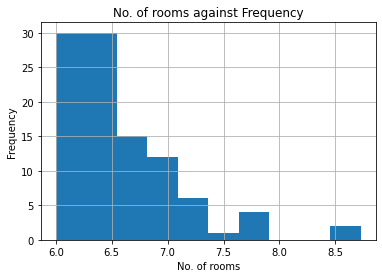

In [50]:
# ANSWER

large_houses.hist(column='RM')
#alternative:
    #plt.hist(large_houses['RM'])
    
plt.title('No. of rooms against Frequency')
plt.xlabel('No. of rooms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

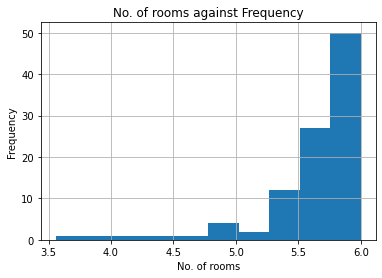

In [51]:
small_houses.hist(column='RM')
plt.title('No. of rooms against Frequency')
plt.xlabel('No. of rooms')
plt.ylabel('Frequency')

##### 7. Calculate Variance

Calculate variance for both samples.

In [57]:
# ANSWER
var_largehouses = np.var(large_houses['RM'], ddof=1) #default ddof for np.var method is 0
    #large_houses['RM'].var() 
    #default ddof is 1 for dataframe method ^
print("variance for large houses' rooms = ", var_largehouses)

var_smallhouses = np.var(small_houses['RM'])
print("variance for small houses' rooms = ", var_smallhouses)

variance for large houses' rooms =  0.281470696060606
variance for small houses' rooms =  0.19290016910000002


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [60]:
# ANSWER
std_pooled = np.sqrt((var_largehouses + var_smallhouses) / 2)
std_pooled

0.4870168709401174

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [68]:
# ANSWER
t_statistic = (np.mean(large_houses['RM'])-np.mean(small_houses['RM'])) / (std_pooled * (np.sqrt(2/100)))
t_statistic

#instead of using np.mean(large_houses['RM']) can use large_houses['RM'].mean()

13.967415999128697

In [ ]:
#ALERT ALERT ALERT
#ryan's note: we should be looking at price (which is comparable) not the rooms cuz we separated the samples BY no. of rooms
#the t-stat is so large (14) since we're comparing 2 separated samples so the difference IS huge

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [65]:
# ANSWER
n = len(small_houses) + len(large_houses)
ddof = n-2 #since 2 samples, deduct 1 per sample

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [73]:
# ANSWER
from scipy import stats

#find p-value after comparison with the t 
#stats.t.cdf = cumulative density function for t
if (t_statistic > 0): 
    p = 1 - stats.t.cdf(t_statistic, df = ddof) 
else:
    p = stats.t.cdf(t_statistic, df = ddof)
    
print("t = " + str(t_statistic))
print("p = " + str(2*p))

t = 13.967415999128697
p = 0.0


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [74]:
# ANSWER

def test_hypothesis(p_value, alpha):
    if p_value < alpha:
        print('Reject the null hypothesis, diff is statistically significant.')
    else:
        print('Fail to reject the null hypothesis, diff is statistically insignificant.')
        
test_hypothesis(0.0, alpha)       

Reject the null hypothesis, diff is statistically significant.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [21]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [75]:
# ANSWER
stats.ttest_ind(np.array(large_houses['RM']), np.array(small_houses['RM']))
#inputs for 2 samples should be in array form
#returns t-value and p-value

Ttest_indResult(statistic=13.938818366249608, pvalue=3.2071307745022035e-31)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



